In [9]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [10]:
# Load the customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [11]:
# First look at its main features (head, shape, info).
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [12]:
# Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [13]:
# Change the type of effective_to_date column to DateTime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [14]:
# Check NaN values per column.
display(customer_df.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [15]:
# Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
def split_df(df):
    numerical_df = df.select_dtypes(include = np.number)
    categorical_df = df.select_dtypes(include = object)
    return numerical_df, categorical_df
numerical_df, categorical_df = split_df(customer_df)
print(customer_df.shape, numerical_df.shape, categorical_df.shape)

(9134, 24) (9134, 8) (9134, 15)


In [16]:
# Drop any ID column.
categorical_df = categorical_df.drop(['customer'], axis = 1)

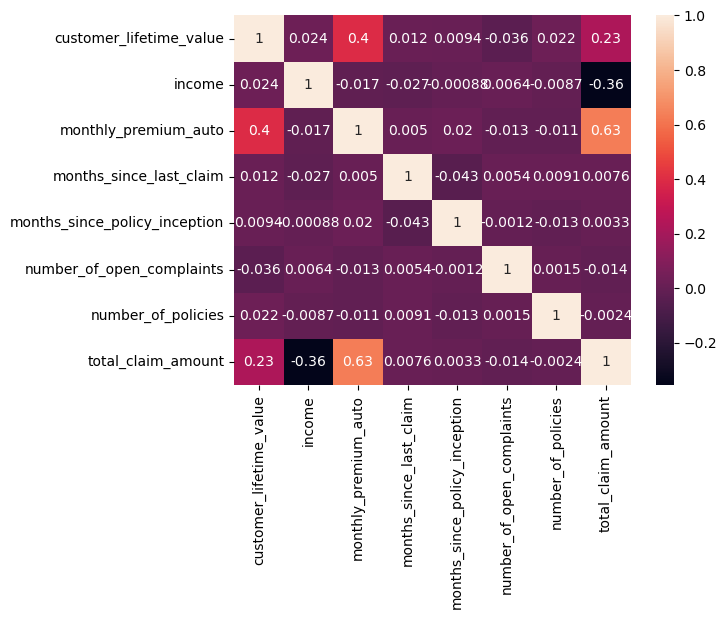

In [17]:
# Get the correlation matrix for the numerical variables. 
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot = True);

In [18]:
# What is the pair of numerical variables that have the highest correlation? It makes sense, why?
# The pair of numerical variables that have the highest correlation is total_claim_amount and monthly_premium. 
# It makes sense because the higher the monthly premium, the higher the total claim amount.

In [19]:
# Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: 
# the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. 
# To this end, it might be helpful to count the number of unique values. 
# The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. 
# Then, use it to create two new dataframes: continuous_df and discrete_df.
def split_df(df, n = 36):
    numerical_df = df.select_dtypes(include = np.number)
    continuous_df = numerical_df.loc[:, numerical_df.nunique() > n]
    discrete_df = numerical_df.loc[:, numerical_df.nunique() <= n]
    return continuous_df, discrete_df

continuous_df, discrete_df = split_df(customer_df)
print(continuous_df.shape, discrete_df.shape)

(9134, 5) (9134, 3)


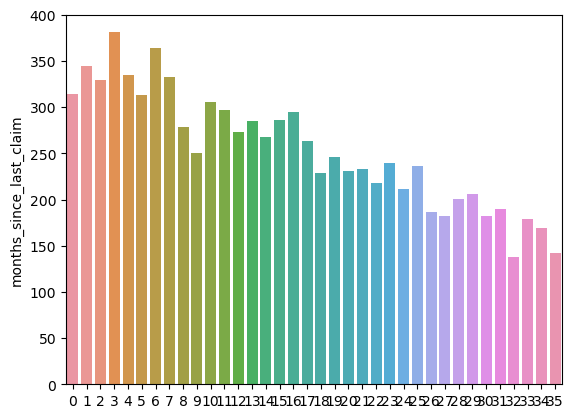

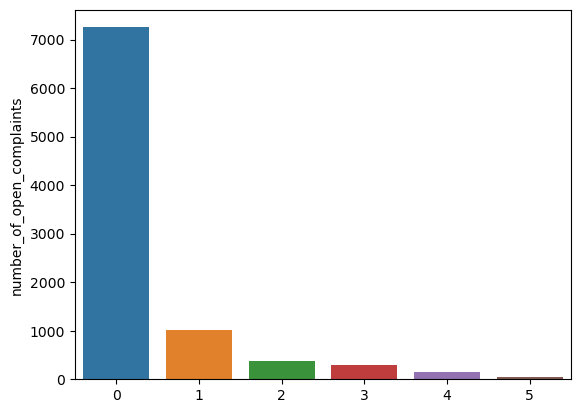

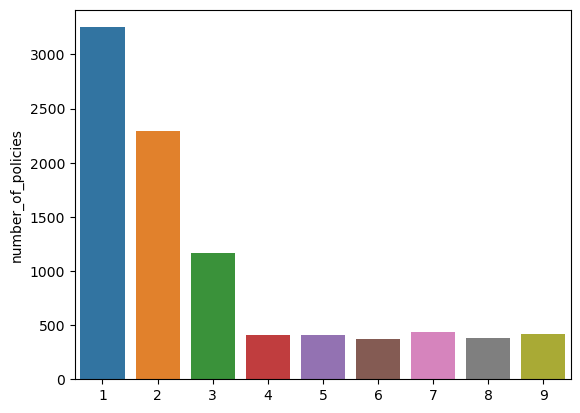

In [20]:
# Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).
def barplot(df):
    for col in df:
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        plt.show()
barplot(discrete_df)


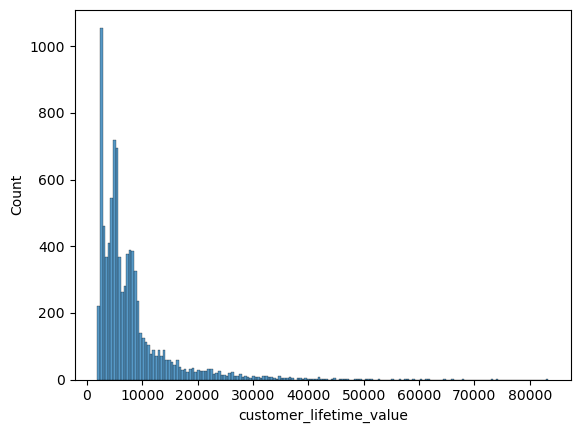

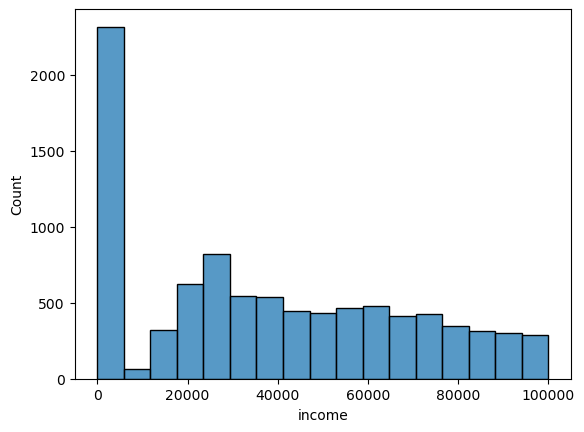

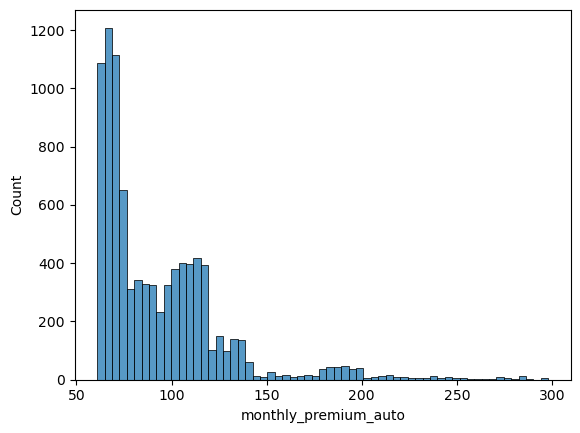

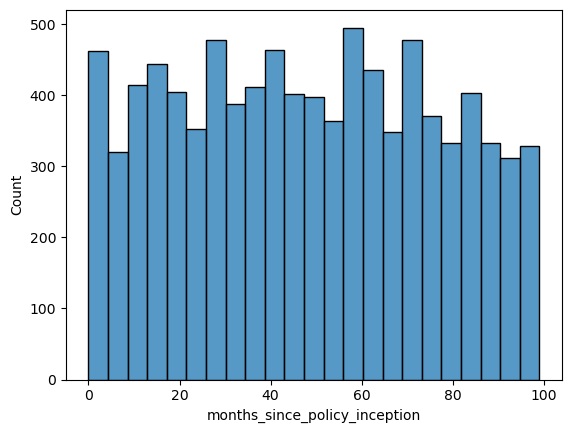

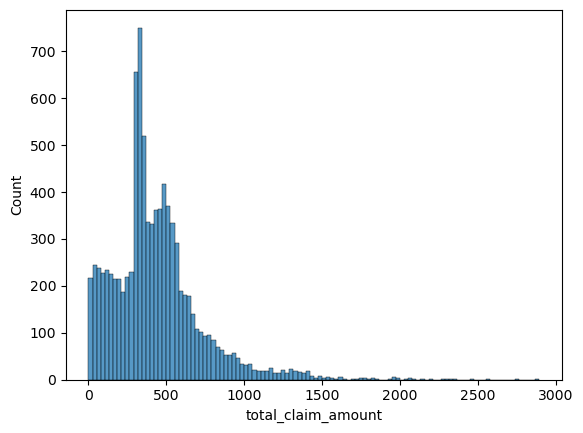

In [21]:
# Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
def histogram(df):
    for col in df:
        sns.histplot(df[col])
        plt.show()
histogram(continuous_df)

In [22]:
# According to the previous histogram plots, do you think that you will have to apply any transformation?
# The distribution is skewed to the left so applynig a transformation is necessary.

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


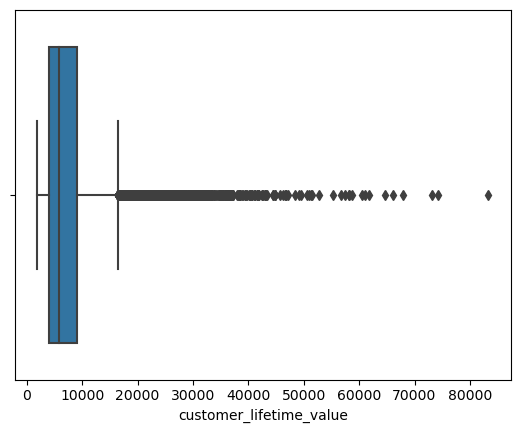

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


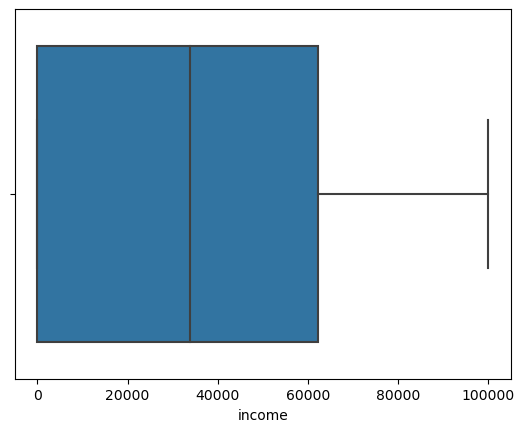

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


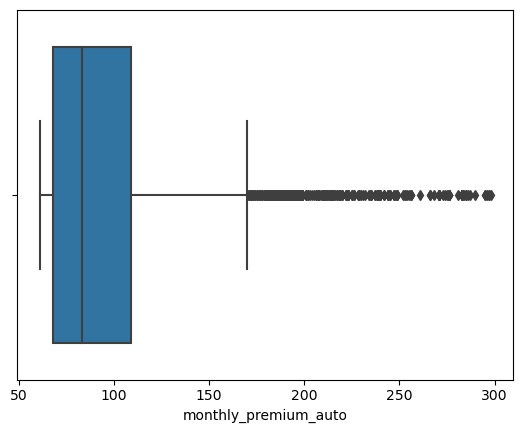

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


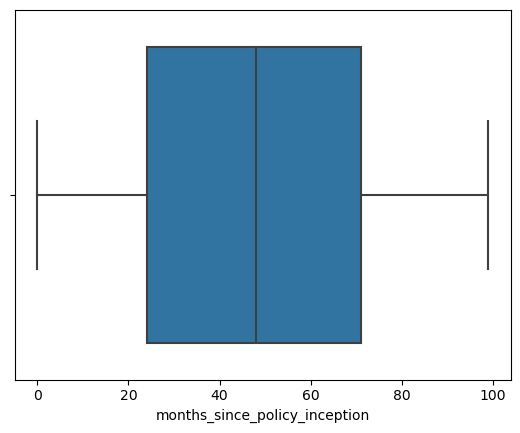

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


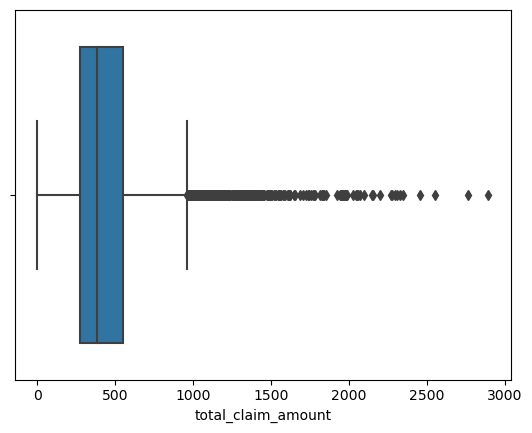

In [23]:
# Look for outliers in the continuous variables that you have found. 
# Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.
def boxplot(df):
    for col in df:
        sns.boxplot(df[col])
        plt.show()
boxplot(continuous_df);

In [24]:
# There are quite a few outliers in the continuous variables!

## Lab | Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case of the previous lab. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

### Special instructions
As in this lab, we will keep working on the same dataset as the previous lab, please make a copy of the final Jupyter notebook of the previous lab in the current lab folder. Next, use Markdown to add a new section in the Jupyter notebook named Lab Cleaning Categorical Data. Then restart the Kernel and run all the previous cells. Finally, keep working on the same notebook according to the next instructions.

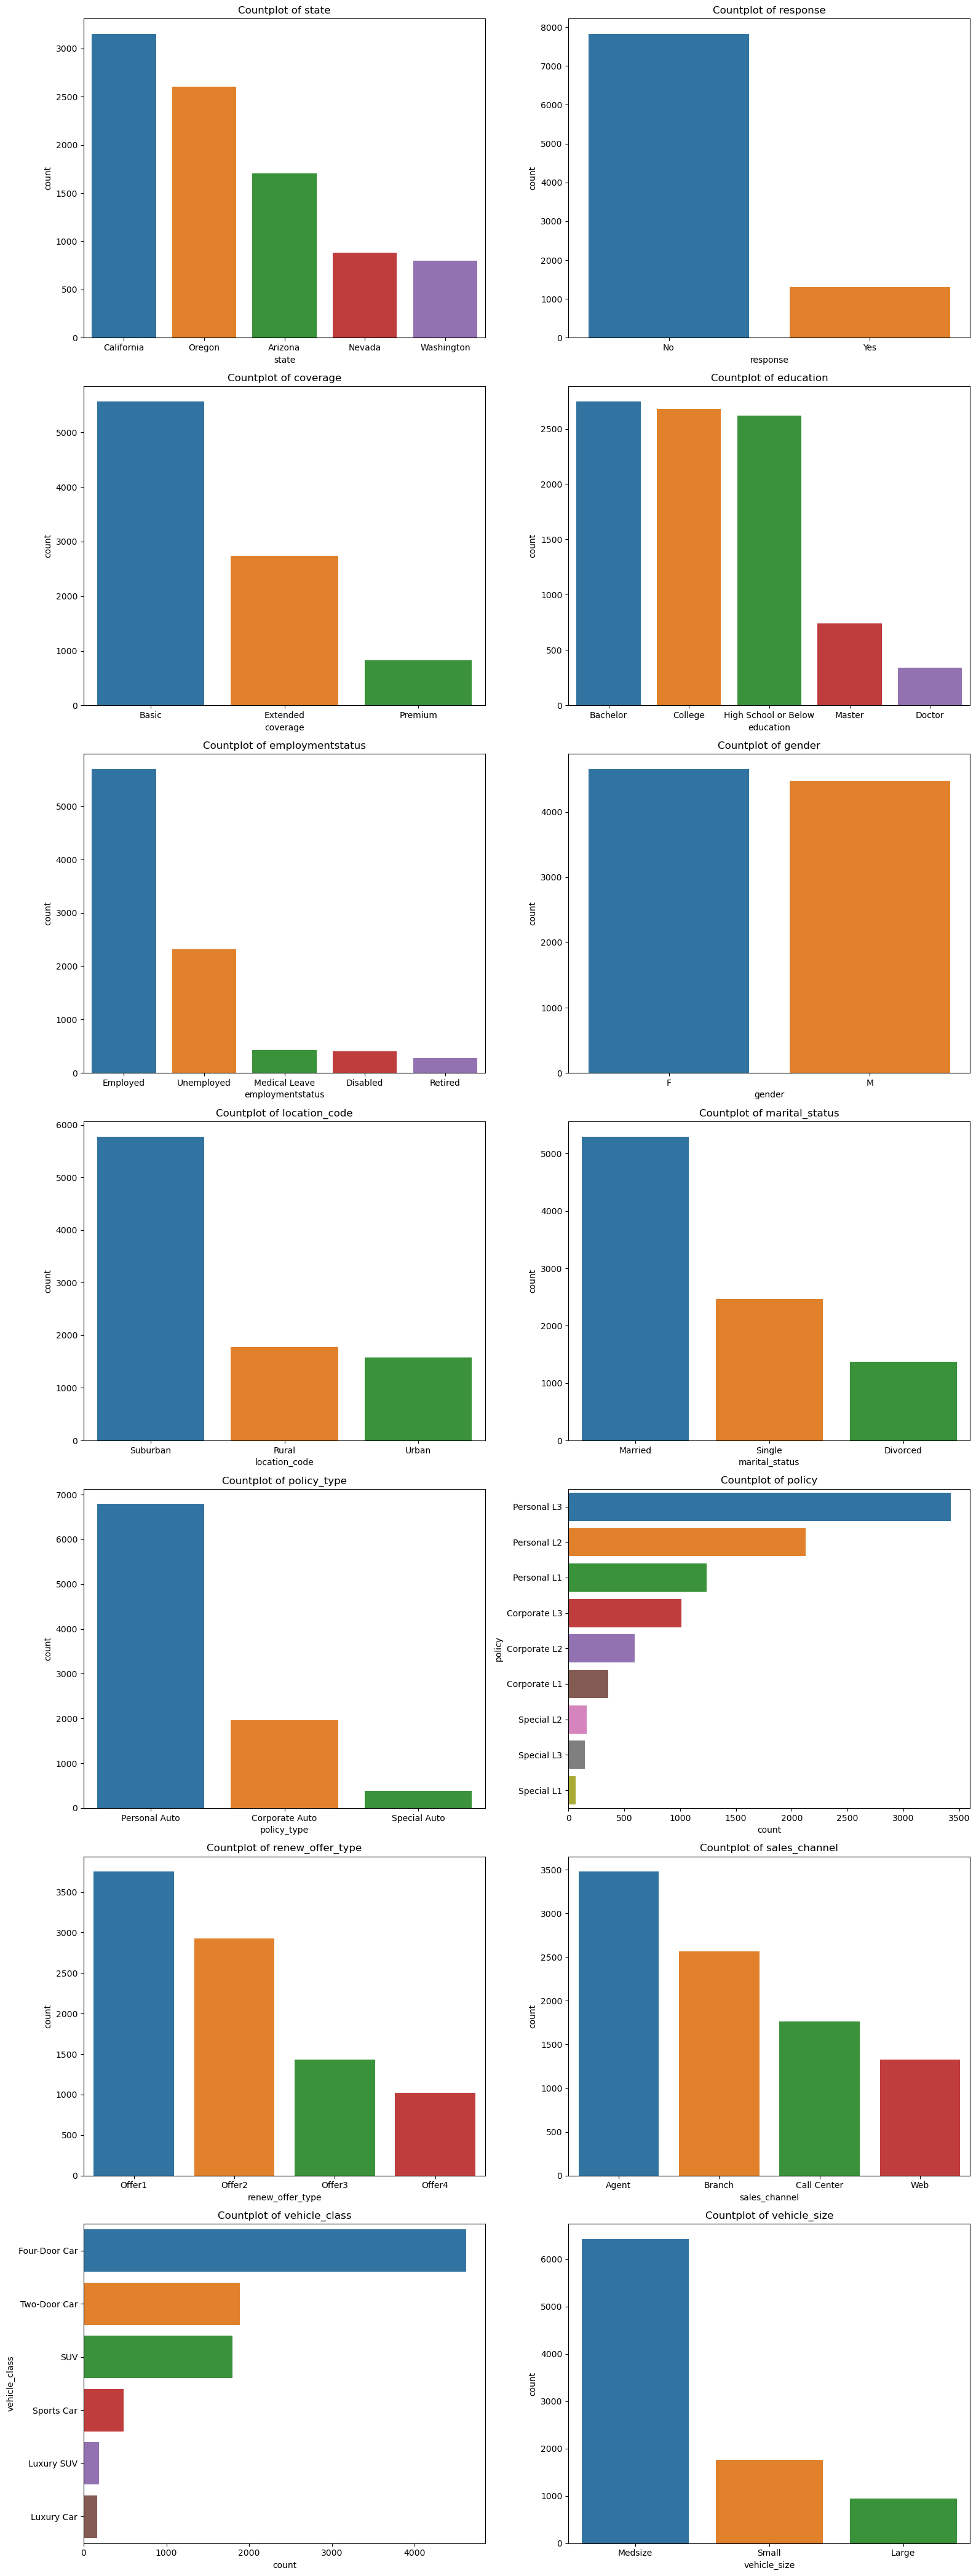

In [25]:
# Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. 
# Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). 
# In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

def plot_categorical_columns(df, ncols=2):
    fig, axes = plt.subplots(nrows=-(-len(df.columns) // ncols), ncols=ncols, figsize=(16, 6 * -(-len(df.columns) // ncols)))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        order = df[column].value_counts(ascending=False).index

        if len(order) >= 6:
            sns.countplot(y=column, data=df, order=order, ax=axes[i])
        else:
            sns.countplot(x=column, data=df, order=order, ax=axes[i])

        axes[i].set_title(f'Countplot of {column}')
    
    fig.delaxes(axes[-1]) if len(df.columns) % ncols != 0 else None
    plt.tight_layout()
    plt.show()

# Use the function with your 'categorical_df'
plot_categorical_columns(categorical_df)


In [26]:
# policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) 
# which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. 
# Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.
import re

categorical_df = categorical_df.drop(['policy_type'], axis = 1)

def transform_policy(policy_value):
    pattern = r'(L1|L2|L3)'
    match = re.search(pattern, policy_value)
    
    if match:
        return match.group(0)
    else:
        return 'Other'

categorical_df['policy'] = categorical_df['policy'].apply(transform_policy)

categorical_df['policy'].value_counts()


L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

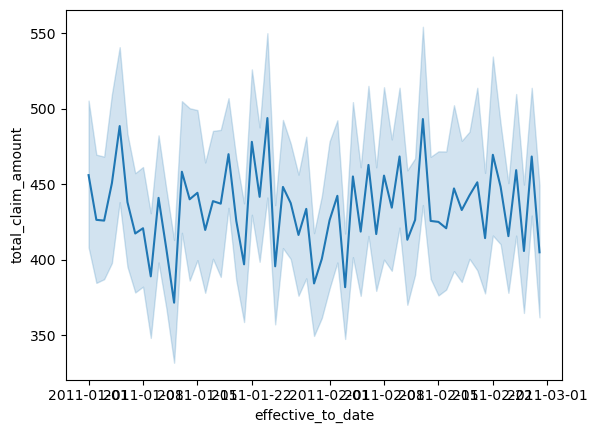

In [27]:
# Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. 
# Use a figsize=(10,10)
fig, figsize=(10,10)
sns.lineplot(x = customer_df['effective_to_date'], y = customer_df['total_claim_amount'])
plt.show()

In [28]:
# To continue the analysis define an empty pandas DataFrame, and add the following new columns:
# - day with the day number of effective_to_date
# - day_name with the day NAME of effective_to_date
# - week with the week of effective_to_date
# - month with the month NAME of effective_to_date
# - total_claim_amount with total_claim_amount

data = {'day': customer_df['effective_to_date'].dt.day,
        'day_name': customer_df['effective_to_date'].dt.day_name(),
        'week': customer_df['effective_to_date'].dt.isocalendar().week,
        'month': customer_df['effective_to_date'].dt.month_name(),
        'total_claim_amount': customer_df['total_claim_amount']}
new_df = pd.DataFrame(data)
new_df.head()


,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


In [29]:
# Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)
new_df_day = new_df.groupby(['day_name']).agg({'total_claim_amount':sum})
new_df_day = new_df_day.groupby('day_name')['total_claim_amount'].sum().round(2).reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

new_df_day

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

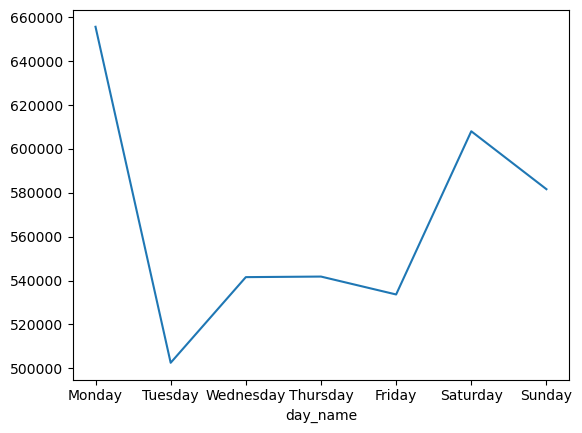

In [30]:
# Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?
sns.lineplot(x = new_df_day.index, y = new_df_day.values)
plt.show()

In [31]:
# Accidents seem to happen more on weekends, probably report them on the following monday.

In [32]:
# Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

merge_customer_day = customer_df.merge(new_df['day_name'], left_index=True, right_index=True)
open_complaints_day = merge_customer_day.groupby(['day_name']).agg({'number_of_open_complaints': 'count'})
open_complaints_day = open_complaints_day.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

new_df_day = pd.concat([new_df_day, open_complaints_day], axis=1)
new_df_day

,total_claim_amount,number_of_open_complaints
day_name,,
Monday,655689.71,1530
Tuesday,502518.93,1162
Wednesday,541563.05,1221
Thursday,541820.80,1249
Friday,533658.79,1245
Saturday,608060.10,1397
Sunday,581655.66,1330


In [33]:
# Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

median_claim_day = new_df.groupby(['day_name'])['total_claim_amount'].median().round(2)
median_claim_day = median_claim_day.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

new_df_day['median_total_claim_amount'] = median_claim_day
new_df_day

,total_claim_amount,number_of_open_complaints,median_total_claim_amount
day_name,,,
Monday,655689.71,1530,385.74
Tuesday,502518.93,1162,378.49
Wednesday,541563.05,1221,392.24
Thursday,541820.80,1249,395.33
Friday,533658.79,1245,371.80
Saturday,608060.10,1397,379.20
Sunday,581655.66,1330,383.72


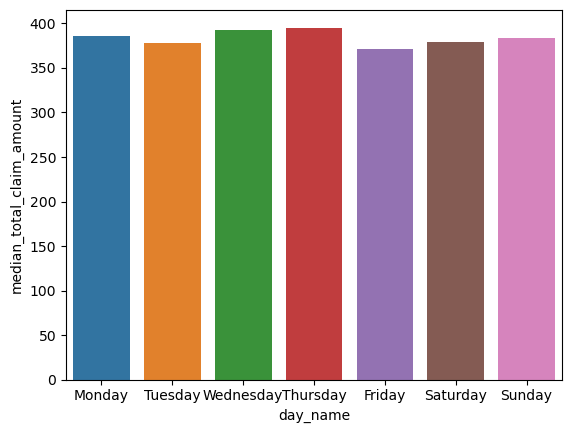

In [34]:
# Plot the median "target" by day of the week name using a seaborn barplot
sns.barplot(x = new_df_day.index, y = new_df_day['median_total_claim_amount'])
plt.show()


In [35]:
# What can you conclude from this analysis? 
# Even though the claims happen on the weekend and on Monday, the total claim amount is roughly the same every day of the week

In [36]:
# Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

new_df.groupby('month').agg({'total_claim_amount':'sum'}).round(2).reindex(index={'January','February'})

,total_claim_amount
month,
January,2117142.86
February,1847824.19


In [37]:
# Can you do a monthly analysis given the output of the previous series? Why?
# No we only have 2 months of data so this won't be very useful

In [38]:
# Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
# Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
print(continuous_df.shape)
def remove_outliers_all_columns(df, thr=3):
    for column in df.columns:
        if df[column].dtype != 'object':  # Apply only to numerical columns
            mean = df[column].mean()
            std = df[column].std()
            df = df[(df[column] > mean - thr * std) & (df[column] < mean + thr * std)]
    return df

continuous_clean_df = remove_outliers_all_columns(continuous_df)
print(continuous_clean_df.shape)

(9134, 5)
(8575, 5)


In [39]:
# Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. 
# After removing outliers the continuous_cleaned dataframe will have fewer rows 
# (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. 
# Use pd.dropna() and .reset_index() to fix the final dataframe.

data_concat = pd.concat([discrete_df, categorical_df, new_df['day_name'], continuous_clean_df], axis=1)
data_concat = data_concat.dropna().reset_index(drop=True)
display(data_concat.head())
data_concat.shape

,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,gender,location_code,...,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day_name,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,32,0,1,Washington,No,Basic,Bachelor,Employed,F,Suburban,...,Offer1,Agent,Two-Door Car,Medsize,Thursday,2763.519279,56274.0,69.0,5.0,384.811147
1,13,0,8,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,...,Offer3,Agent,Four-Door Car,Medsize,Monday,6979.535903,0.0,94.0,42.0,1131.464935
2,18,0,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,...,Offer1,Agent,Two-Door Car,Medsize,Saturday,12887.431650,48767.0,108.0,38.0,566.472247
3,18,0,7,California,No,Basic,Bachelor,Unemployed,M,Suburban,...,Offer1,Call Center,SUV,Medsize,Thursday,7645.861827,0.0,106.0,65.0,529.881344
4,12,0,1,Washington,No,Basic,Bachelor,Employed,M,Rural,...,Offer1,Agent,Four-Door Car,Medsize,Thursday,2813.692575,43836.0,73.0,44.0,138.130879


(8575, 22)

In [40]:
# Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

# I added the continuous df as last in the concat, so it's already the last column

In [41]:
# Turn the response column values into (Yes=1/No=0).
data_concat['response'] = data_concat['response'].apply(lambda x: 1 if x == 'Yes' else 0)
data_concat['response'].value_counts()

0    7339
1    1236
Name: response, dtype: int64

In [42]:
# Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
data_concat['education'] = data_concat['education'].apply(lambda x: 'Graduate' if x in ['Master', 'Doctor'] else x)
data_concat['education'].value_counts()

Bachelor                2585
College                 2531
High School or Below    2441
Graduate                1018
Name: education, dtype: int64

In [43]:
# Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. 
# In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
data_concat['employmentstatus'] = data_concat['employmentstatus'].apply(lambda x: 'Inactive' if x in ['Medical Leave', 'Disabled', 'Retired'] else x)
data_concat['employmentstatus'].value_counts()

Employed      5384
Unemployed    2127
Inactive      1064
Name: employmentstatus, dtype: int64

In [44]:
# Deal with column Gender turning the values into (1/0).
data_concat['gender'] = data_concat['gender'].apply(lambda x: 1 if x in ('F') else 0)
data_concat['gender'].value_counts()

1    4383
0    4192
Name: gender, dtype: int64

In [45]:
# Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
data_concat['vehicle_class'] = data_concat['vehicle_class'].apply(lambda x: 'Luxury' if x in ['Sports Car', 'Luxury SUV', 'Luxury Car'] else x)
data_concat['vehicle_class'].value_counts()

Four-Door Car    4577
Two-Door Car     1869
SUV              1627
Luxury            502
Name: vehicle_class, dtype: int64

In [46]:
# Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".
data_concat['coverage'] = data_concat['coverage'].apply(lambda x: 3 if x == 'Premium' else (2 if x == 'Extended' else 1))
data_concat['coverage'].value_counts()

1    5353
2    2541
3     681
Name: coverage, dtype: int64

In [47]:
# Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".
data_concat['employmentstatus'] = data_concat['employmentstatus'].apply(lambda x: 3 if x == 'Employed' else (2 if x == 'Inactive' else 1))
data_concat['employmentstatus'].value_counts()

3    5384
1    2127
2    1064
Name: employmentstatus, dtype: int64

In [48]:
# Encode the column location_code as: "Urban" > "Suburban" > "Rural".
data_concat['location_code'] = data_concat['location_code'].apply(lambda x: 3 if x == 'Urban' else (2 if x == 'Suburban' else 1))
data_concat['location_code'].value_counts()

2    5342
1    1710
3    1523
Name: location_code, dtype: int64

In [49]:
# Encode the column vehicle_size as: "Large" > "Medsize" > "Small".
data_concat['vehicle_size'] = data_concat['vehicle_size'].apply(lambda x: 3 if x == 'Large' else (2 if x == 'Medsize' else 1))
data_concat['vehicle_size'].value_counts()

2    6033
1    1644
3     898
Name: vehicle_size, dtype: int64

In [50]:
# Get a dataframe with the categorical nominal columns 
categorical_nominal_df = data_concat.select_dtypes(include='object')
categorical_nominal_df.head()

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,day_name
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Thursday
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car,Monday
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car,Saturday
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV,Thursday
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Thursday


In [51]:
# Create a list of named levels which that has as many elements as categorical nominal columns. 
# Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
# levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
state = list(set(list(categorical_nominal_df['state'])))
education = list(set(list(categorical_nominal_df['education'])))
marital_status = list(set(list(categorical_nominal_df['marital_status'])))
policy = list(set(list(categorical_nominal_df['policy'])))
renew_offer_type = list(set(list(categorical_nominal_df['renew_offer_type'])))
sales_channel = list(set(list(categorical_nominal_df['sales_channel'])))
vehicle_class = list(set(list(categorical_nominal_df['vehicle_class'])))
day_name = list(set(list(categorical_nominal_df['day_name'])))
levels = [state, education, marital_status, policy, renew_offer_type, sales_channel, vehicle_class, day_name]
levels

[['California', 'Oregon', 'Nevada', 'Washington', 'Arizona'],
 ['High School or Below', 'Bachelor', 'College', 'Graduate'],
 ['Married', 'Divorced', 'Single'],
 ['L3', 'L1', 'L2'],
 ['Offer3', 'Offer4', 'Offer2', 'Offer1'],
 ['Agent', 'Call Center', 'Branch', 'Web'],
 ['Four-Door Car', 'Two-Door Car', 'Luxury', 'SUV'],
 ['Saturday',
  'Wednesday',
  'Friday',
  'Monday',
  'Tuesday',
  'Thursday',
  'Sunday']]

In [52]:
# Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels
from sklearn.preprocessing import OneHotEncoder
OneHot = OneHotEncoder(drop='first', categories=levels)
encoded = OneHot.fit_transform(categorical_nominal_df).toarray()
encoded = pd.DataFrame(encoded, columns=OneHot.get_feature_names_out())
encoded.head()

,state_Oregon,state_Nevada,state_Washington,state_Arizona,education_Bachelor,education_College,education_Graduate,marital_status_Divorced,marital_status_Single,policy_L1,...,sales_channel_Web,vehicle_class_Two-Door Car,vehicle_class_Luxury,vehicle_class_SUV,day_name_Wednesday,day_name_Friday,day_name_Monday,day_name_Tuesday,day_name_Thursday,day_name_Sunday
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Lab Comparing Regression Models.

In [152]:
# Define X and y
x = data_concat.drop('total_claim_amount', axis=1)
y = data_concat['total_claim_amount']

In [153]:
# Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=31)

In [154]:
# Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
X_train_num = x_train.select_dtypes(include = np.number)
X_test_num  = x_test.select_dtypes(include = np.number)
X_train_cat = x_train.select_dtypes(include = object)
X_test_cat = x_test.select_dtypes(include = object)

In [156]:
# Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. 
# Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. 
# Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_cat)  

X_train_cat_ar = encoder.transform(X_train_cat).toarray()
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_ar, columns=encoder.get_feature_names_out())

X_test_cat_ar = encoder.transform(X_test_cat).toarray()
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_ar, columns=encoder.get_feature_names_out())


In [157]:
# Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. 
# Next, cast the resulting numpy arrays as pandas dataframes. 
# Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. 
# Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X_train_num)

X_train_num_transformed = pt.transform(X_train_num)
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns)

X_test_num_transformed = pt.transform(X_test_num)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns)

In [158]:
# Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

# Reset the indices of the DataFrames
X_train_num_transformed_df.index = x_train.index
X_train_cat_encoded_df.index = x_train.index
X_test_num_transformed_df.index = x_test.index
X_test_cat_encoded_df.index = x_test.index

X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)
X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)



In [159]:
# Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. 
# Create new pandas dataframes from the resulting numpy arrays. 
# Remember to set the correct columns names and indexes. 
# Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_new)
X_train_new_scaled_df = pd.DataFrame(transformer.transform(X_train_new), columns=X_train_new.columns)
X_test_new_scaled_df = pd.DataFrame(transformer.transform(X_test_new), columns=X_test_new.columns)



In [63]:
# Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_new_scaled_df,y_train)
y_pred_train = lm.predict(X_train_new_scaled_df)
y_pred_test = lm.predict(X_test_new_scaled_df)

In [74]:
# Create a function that given a model prediction and real values returns a pandas dataframe with the following table:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

def metrics_table(X_train, X_test, y_train):
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred_train = lm.predict(X_train)
    y_pred_test = lm.predict(X_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    mse_test = metrics.mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
    mape_test = metrics.mean_absolute_percentage_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    data = [['MAE', mae_test], ['MSE', mse_test], ['RMSE', rmse_test], ['MAPE', mape_test], ['R2', r2_test]]
    df_total = pd.DataFrame(data=data, columns=['Error_metric', 'Value'])
    
    return df_total


In [75]:
# Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets
metrics_table(X_train_new_scaled_df, X_test_new_scaled_df, y_train)

,Error_metric,Value
0,MAE,119.239197
1,MSE,23666.469387
2,RMSE,153.839102
3,MAPE,1.678944
4,R2,0.517791


In [164]:
# Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) 
# so we can train a lot of them without repeating code. The function must return the list of trained models.
def test_models(list_models,x_train,y_train):
        
    import re
    
    y_pred=[]
    models=[]
    
    for i in list_models:
        im = i+'()'
        model = eval(im)
        data = model.fit(X_train_new_scaled_df,y_train)
        y_pred.append(list(data.predict(x_train)))
        models.append(re.sub('[^A-Z]', '', i))
        
    y_pred = pd.DataFrame(y_pred,index=models).T
        
    return y_pred

In [165]:
# Use the function to train the following models (with default settings):
# *LinearRegressor
# *KNeighborsRegressor
# *MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
list_models = ['LinearRegression','KNeighborsRegressor','MLPRegressor']
y_train_pred = test_models(list_models, X_train_new_scaled_df, y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [166]:
# Evaluate the models with the function created earlier in the TRAIN and TEST sets. 
# Which model performs best with the default options?
y_train_pred = test_models(list_models, X_train_new_scaled_df, y_train)
return_errors(y_train_pred,y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,error_metric,MAE,MSE,RMSE,MAPE,R2
0,LR,118.48,22979.64,151.59,0.41,0.13
1,KNR,102.42,19326.92,139.02,0.29,0.17
2,MLPR,110.19,20663.20,143.75,0.37,0.25


In [ ]:
# The MLPR model seems to perform the best 